In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = 'https://storage.googleapis.com/javalove93-samples/kaggle/corona2/covid_19_data.csv'
# data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',', skip_header=1)
# df = pd.DataFrame(data)
!wget $url -O covid_19_data.csv
!wc -l covid_19_data.csv
!head covid_19_data.csv


--2020-04-15 12:02:21--  https://storage.googleapis.com/javalove93-samples/kaggle/corona2/covid_19_data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 887214 (866K) [application/octet-stream]
Saving to: ‘covid_19_data.csv’

covid_19_data.csv   100%[===================>] 866.42K  --.-KB/s    in 0.008s  

2020-04-15 12:02:22 (104 MB/s) - ‘covid_19_data.csv’ saved [887214/887214]

13851 covid_19_data.csv
SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2

In [0]:
df = pd.read_csv("covid_19_data.csv")
df.ObservationDate = pd.to_datetime(df.ObservationDate)
df = df.set_index('ObservationDate')

# 데이터를 출력해 보면 Month와 #Passengers라는 두 개의 필드를 가진 데이터
print(df)
df.head()

                   SNo Province/State  ... Deaths Recovered
ObservationDate                        ...                 
2020-01-22           1          Anhui  ...    0.0       0.0
2020-01-22           2        Beijing  ...    0.0       0.0
2020-01-22           3      Chongqing  ...    0.0       0.0
2020-01-22           4         Fujian  ...    0.0       0.0
2020-01-22           5          Gansu  ...    0.0       0.0
...                ...            ...  ...    ...       ...
2020-04-10       13846        Wyoming  ...    0.0       0.0
2020-04-10       13847       Xinjiang  ...    3.0      73.0
2020-04-10       13848          Yukon  ...    0.0       0.0
2020-04-10       13849         Yunnan  ...    2.0     173.0
2020-04-10       13850       Zhejiang  ...    1.0    1235.0

[13850 rows x 7 columns]


,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Populating the interactive namespace from numpy and matplotlib


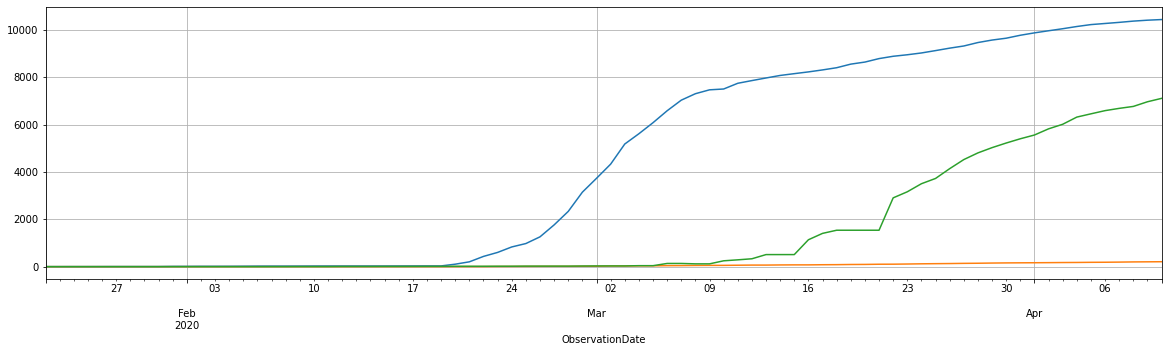

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


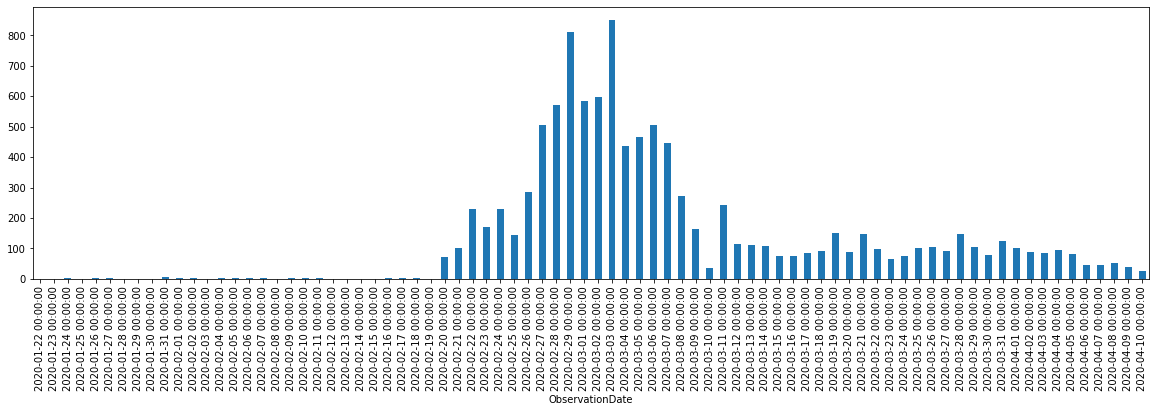

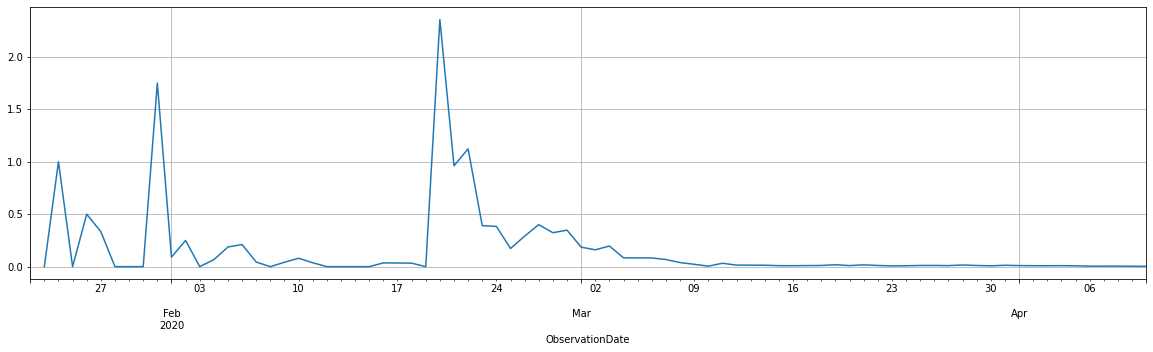

In [0]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

# South Korea
df_korea = df[df['Country/Region'] == 'South Korea']
df_korea.Confirmed.plot(grid=True)
df_korea.Deaths.plot(grid=True)
df_korea.Recovered.plot(grid=True)
plt.show()

# Don't need apply() function since there are built-in functions, pct_change() and diff()
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/
df_korea['Pct_Change'] = df_korea.Confirmed.pct_change()
df_korea['Daily_Confirmed'] = df_korea.Confirmed.diff()

df_korea.Daily_Confirmed.plot(kind='bar')
plt.show()

df_korea.Pct_Change.plot(grid=True)
plt.show()

In [0]:
df_korea

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Pct_Change,Daily_Confirmed
ObservationDate,,,,,,,,,
2020-01-22,38,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,NaN,NaN
2020-01-23,76,NaN,South Korea,1/23/20 17:00,1.0,0.0,0.0,0.000000,0.0
2020-01-24,122,NaN,South Korea,1/24/20 17:00,2.0,0.0,0.0,1.000000,1.0
2020-01-25,163,NaN,South Korea,1/25/20 17:00,2.0,0.0,0.0,0.000000,0.0
2020-01-26,209,NaN,South Korea,1/26/20 16:00,3.0,0.0,0.0,0.500000,1.0
...,...,...,...,...,...,...,...,...,...
2020-04-06,12401,NaN,South Korea,4/6/20 9:37,10284.0,186.0,6598.0,0.004591,47.0
2020-04-07,12721,NaN,South Korea,2020-04-07 23:11:31,10331.0,192.0,6694.0,0.004570,47.0
2020-04-08,13041,NaN,South Korea,2020-04-08 22:59:00,10384.0,200.0,6776.0,0.005130,53.0


In [0]:
data_y = df_korea['Confirmed']
print(max(list(data_y)))
max_confirmed = max(list(data_y))
data_y

10450.0


ObservationDate
2020-01-22        1.0
2020-01-23        1.0
2020-01-24        2.0
2020-01-25        2.0
2020-01-26        3.0
               ...   
2020-04-06    10284.0
2020-04-07    10331.0
2020-04-08    10384.0
2020-04-09    10423.0
2020-04-10    10450.0
Name: Confirmed, Length: 80, dtype: float64

In [0]:
data_y = np.asarray([[y/max_confirmed] for y in data_y])

In [0]:
#temp_data_y = np.asarray([[0] if y/max_confirmed<0.5 else [1] for y in temp_data_y])

In [0]:
data_y

array([[9.56937799e-05],
       [9.56937799e-05],
       [1.91387560e-04],
       [1.91387560e-04],
       [2.87081340e-04],
       [3.82775120e-04],
       [3.82775120e-04],
       [3.82775120e-04],
       [3.82775120e-04],
       [1.05263158e-03],
       [1.14832536e-03],
       [1.43540670e-03],
       [1.43540670e-03],
       [1.53110048e-03],
       [1.81818182e-03],
       [2.20095694e-03],
       [2.29665072e-03],
       [2.29665072e-03],
       [2.39234450e-03],
       [2.58373206e-03],
       [2.67942584e-03],
       [2.67942584e-03],
       [2.67942584e-03],
       [2.67942584e-03],
       [2.67942584e-03],
       [2.77511962e-03],
       [2.87081340e-03],
       [2.96650718e-03],
       [2.96650718e-03],
       [9.95215311e-03],
       [1.95215311e-02],
       [4.14354067e-02],
       [5.76076555e-02],
       [7.97129187e-02],
       [9.34928230e-02],
       [1.20669856e-01],
       [1.68995215e-01],
       [2.23636364e-01],
       [3.01435407e-01],
       [3.57511962e-01],


In [0]:
# data_y = temp_data_y
len(data_y)

80

In [0]:
data_x = np.asarray([[i/100] for i in range(len(data_y))])

In [0]:
data_x

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


TensorFlow 1.x selected.


In [0]:
x_data = data_x
y_data = data_y

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([1, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False

# predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
# accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
# with tf.Session() as sess:
sess=tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in range(300001): #50만
    cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print(step, cost_val)

# Accuracy report
h = sess.run([hypothesis],
                    feed_dict={X: x_data, Y: y_data})
print("Prediction ", h)
# print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

(80, 1) (80, 1)
0 0.7530296
200 0.66823655
400 0.6328145
600 0.6144358
800 0.6017922
1000 0.5912457
1200 0.5816393
1400 0.5725958
1600 0.5639832
1800 0.55574703
2000 0.547858
2200 0.54029524
2400 0.5330413
2600 0.52608013
2800 0.519397
3000 0.51297796
3200 0.5068099
3400 0.50088024
3600 0.49517733
3800 0.4896899
4000 0.48440748
4200 0.4793202
4400 0.47441864
4600 0.46969396
4800 0.46513766
5000 0.46074206
5200 0.45649943
5400 0.4524029
5600 0.44844562
5800 0.44462138
6000 0.44092417
6200 0.43734828
6400 0.43388838
6600 0.43053943
6800 0.42729655
7000 0.42415524
7200 0.42111117
7400 0.41816014
7600 0.41529852
7800 0.4125224
8000 0.40982836
8200 0.40721312
8400 0.4046735
8600 0.40220642
8800 0.39980906
9000 0.39747876
9200 0.39521283
9400 0.39300895
9600 0.39086476
9800 0.3887779
10000 0.38674635
10200 0.38476807
10400 0.38284102
10600 0.3809635
10800 0.37913367
11000 0.3773499
11200 0.3756105
11400 0.373914
11600 0.3722589
11800 0.37064373
12000 0.36906728
12200 0.36752814
12400 0.36602

In [0]:
# prediction_list=[]
# for h_ in h:
#   prediction_list.append(h_[0]*max_confirmed)
prediction_list = [item[0]*max_confirmed for item in h[0]]

In [0]:
prediction_list

[12.755413353443146,
 14.795619249343872,
 17.160962522029877,
 19.90407556295395,
 23.085688054561615,
 26.773381233215332,
 31.049062311649323,
 36.004915833473206,
 41.74900949001312,
 48.404671251773834,
 56.1164066195488,
 65.04803001880646,
 75.39200782775879,
 87.36572116613388,
 101.22361183166504,
 117.25500226020813,
 135.79125851392746,
 157.2132647037506,
 181.95578306913376,
 210.511814057827,
 243.44380795955658,
 281.3858449459076,
 325.0536009669304,
 375.2468392252922,
 432.85968750715256,
 498.88063818216324,
 574.3937939405441,
 660.5776220560074,
 758.6993485689163,
 870.1006323099136,
 996.1788788437843,
 1138.353605568409,
 1298.0343639850616,
 1476.5625014901161,
 1675.1504316926003,
 1894.8062673211098,
 2136.253470182419,
 2399.8371094465256,
 2685.4375943541527,
 2992.3928156495094,
 3319.4349244236946,
 3664.654517173767,
 4025.5096673965454,
 4398.861740529537,
 4781.071938574314,
 5168.126808106899,
 5555.808594822884,
 5939.866843819618,
 6316.210865974426

In [0]:
temp = pd.Series(prediction_list, name='Prediction')
temp

0        12.755413
1        14.795619
2        17.160963
3        19.904076
4        23.085688
          ...     
75    10327.588892
76    10344.317895
77    10358.779657
78    10371.278760
79    10382.075563
Name: Prediction, Length: 80, dtype: float64

In [0]:
#df_korea_2 = df_korea.join(temp)
df_korea_3 = df_korea.copy()
df_korea_3 = df_korea_3.reset_index()
df_korea_2 = pd.concat([df_korea_3, temp], axis=1)
df_korea_2.set_index('ObservationDate')

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Pct_Change,Daily_Confirmed,Prediction
ObservationDate,,,,,,,,,,
2020-01-22,38,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,NaN,NaN,12.755413
2020-01-23,76,NaN,South Korea,1/23/20 17:00,1.0,0.0,0.0,0.000000,0.0,14.795619
2020-01-24,122,NaN,South Korea,1/24/20 17:00,2.0,0.0,0.0,1.000000,1.0,17.160963
2020-01-25,163,NaN,South Korea,1/25/20 17:00,2.0,0.0,0.0,0.000000,0.0,19.904076
2020-01-26,209,NaN,South Korea,1/26/20 16:00,3.0,0.0,0.0,0.500000,1.0,23.085688
...,...,...,...,...,...,...,...,...,...,...
2020-04-06,12401,NaN,South Korea,4/6/20 9:37,10284.0,186.0,6598.0,0.004591,47.0,10327.588892
2020-04-07,12721,NaN,South Korea,2020-04-07 23:11:31,10331.0,192.0,6694.0,0.004570,47.0,10344.317895
2020-04-08,13041,NaN,South Korea,2020-04-08 22:59:00,10384.0,200.0,6776.0,0.005130,53.0,10358.779657


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


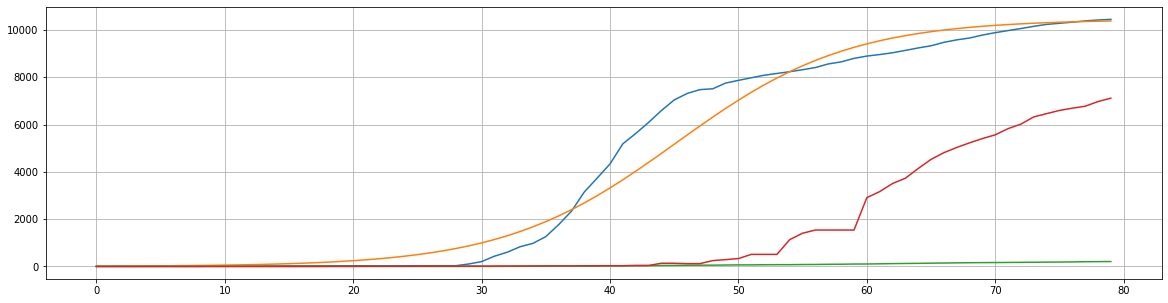

In [0]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 5)

# South Korea
df_korea_2.Confirmed.plot(grid=True)
df_korea_2.Prediction.plot(grid=True)
df_korea_2.Deaths.plot(grid=True)
df_korea_2.Recovered.plot(grid=True)
plt.show()


In [0]:
new_data = [[i/100] for i in range(len(prediction_list),len(prediction_list)+10)]

In [0]:
new_data

[[0.73], [0.74], [0.75], [0.76], [0.77], [0.78], [0.79], [0.8], [0.81], [0.82]]

In [0]:
h_new_data = sess.run([hypothesis], feed_dict={X: new_data})
print("Prediction ", h_new_data)
for nd in h_new_data:
  print(nd*max_confirmed) #4월2일은 8945명으로 예측.. --> 실제는 9976명
#이 결과는 max_confirmed(상한선)를 3월 23의 확진자 수로 놓고 구했음. 이를 개선하면 실제와 조금 더 가까워 질듯.

## - 2차시도 
## 4월 13일은 10034명으로 예측 --> 실제로 10480

Prediction  [array([[0.99136484],
       [0.99265885],
       [0.9937602 ],
       [0.99469715],
       [0.9954941 ],
       [0.9961717 ],
       [0.99674773],
       [0.99723744],
       [0.99765354],
       [0.998007  ]], dtype=float32)]
[[ 9975.113 ]
 [ 9988.134 ]
 [ 9999.216 ]
 [10008.643 ]
 [10016.662 ]
 [10023.4795]
 [10029.275 ]
 [10034.203 ]
 [10038.39  ]
 [10041.946 ]]


In [0]:
###